In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_train-1.csv')

In [3]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001518,Male,Yes,1,Graduate,No,1538,1425.0,30.0,360.0,1.0,Urban,Y
1,1,LP002734,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,Y
2,2,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,N
3,3,LP002455,Male,Yes,2,Graduate,No,3859,0.0,96.0,360.0,1.0,Semiurban,Y
4,4,LP001732,Male,Yes,2,Graduate,NaN,5000,0.0,72.0,360.0,0.0,Semiurban,N


From the data, the label is the loan status which is binary and the features include gender, married, education, loan amount, etc. Some of the features have float data while some have categorical data. There appears missing values in some of the features.

In [4]:
data.shape

(491, 14)

The data has 491 rows of data and has 14 column, of which first column consists of index and the second column consists of loan_ID. In total there are 11 features and 1 label.

In [5]:
data.isnull()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,False,False,False,False,False,False,False,False,False,False,True,False,False,False
487,False,False,False,False,False,False,False,False,False,False,False,False,False,False
488,False,False,False,False,False,False,True,False,False,False,False,False,False,False
489,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term     12
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in the data shown by isnull(). The output 'True' represents missing vlaue. isnull().sum() shows the maximum missing values is 43 in credit_history feature. 

In [7]:
data.dropna(inplace=True)
data.shape

(373, 14)

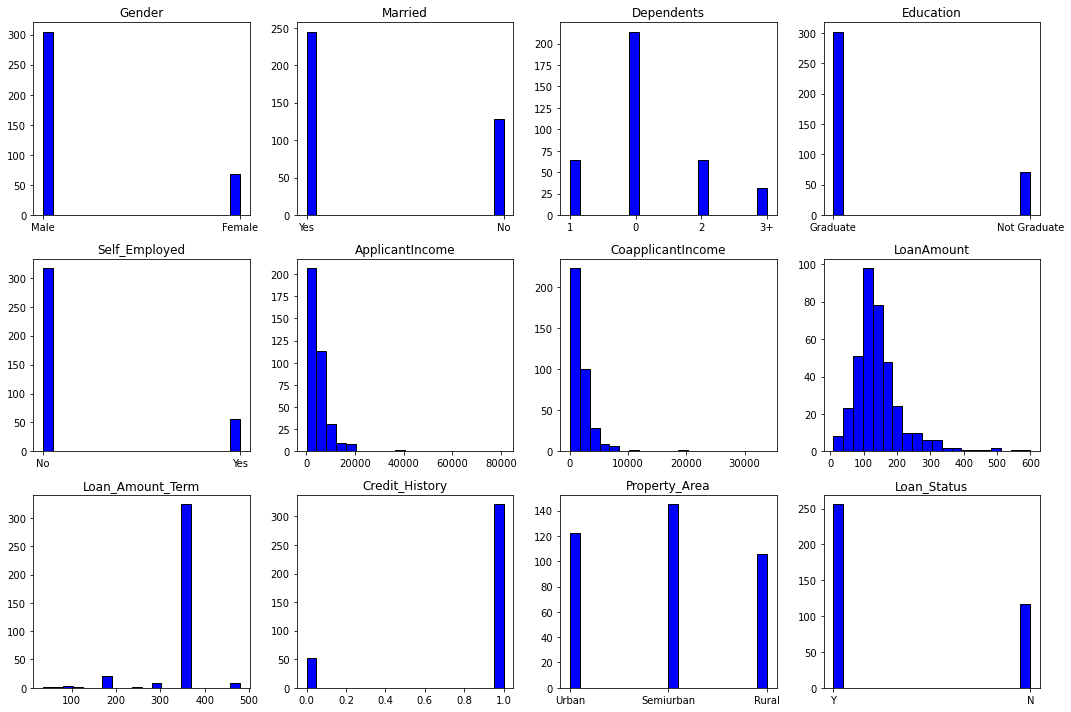

In [8]:
fig,ax = plt.subplots(nrows = 3, ncols=4, figsize = (15,10))

ax = ax.ravel()

for i, col in enumerate(data.columns[2:]):
    ax[i].hist(data[col], bins=20, color='b', edgecolor='k')
    ax[i].set_title(col)
    
plt.tight_layout()

After droping the missing values there remains 373 rows of data.

Since some features are categorical and we may have to convert them to numerical value. For Gender, Married, Education, Self_Employed we can covert them to binary. For Property_Area we may have to define dummy encoding. We need to apply dummy encoding and define the three values of Property_Area distinctly as they are repeated multiple times. 

Ref: https://www.youtube.com/watch?v=WXHLLO4FnZs, 
https://saturncloud.io/blog/how-to-convert-categorical-data-to-numerical-data-with-pandas/#:~:text=The%20easiest%20way%20to%20convert,numerical%20representation%20of%20each%20category.

In [9]:
# data['Loan_Amount_Term'].unique()

In [10]:
data = pd.get_dummies(data, columns=['Property_Area', 'Dependents'])

data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].replace({'No': 0, 'Yes': 1})
data['Education'] = data['Education'].replace({'Not Graduate': 0, 'Graduate': 1})
data['Self_Employed'] = data['Self_Employed'].replace({'No': 0, 'Yes': 1})
data['Loan_Status'] = data['Loan_Status'].replace({'N': 0, 'Y': 1})

data.shape

(373, 19)

In [11]:
data_y = data['Loan_Status'].values
data_x = data.drop(columns=['Loan_ID', 'Loan_Status','Unnamed: 0']).values

x_name = data.drop(columns=['Loan_ID', 'Loan_Status','Unnamed: 0']).columns.to_numpy()
y_name = np.array(['Loan_Status'])



In [45]:
for i in range(data_x.shape[1]):
    print(len(np.unique(data_x[:,i])))

2
2
2
2
316
182
162
9
2
2
2
2
2
2
2
2


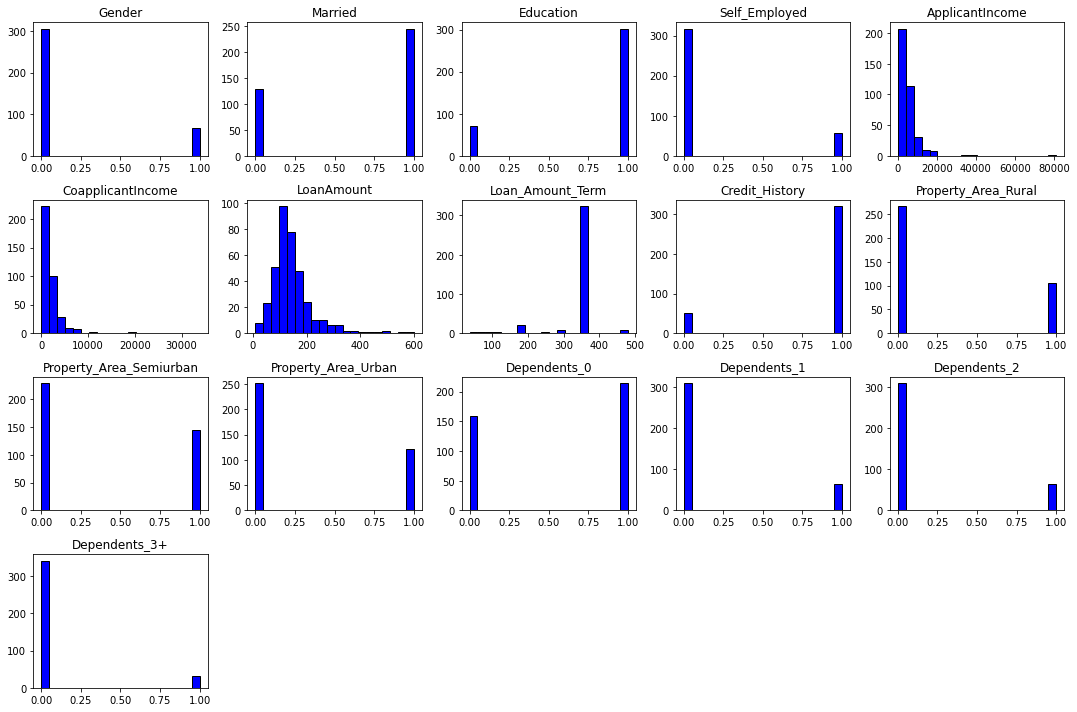

In [12]:
fig,ax = plt.subplots(nrows = 4, ncols=5, figsize = (15,10))

ax = ax.ravel()

for i in range(data_x.shape[1]):
    ax[i].hist(data_x[:,i],bins=20,color='b',edgecolor='k')
    ax[i].set_title(x_name[i])
    
fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
fig.delaxes(ax[-3])
fig.delaxes(ax[-4])
plt.tight_layout()

#### A-2 Implementation

In [29]:
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

# Function to calculate Gini index
def gini(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return 1 - np.sum([p ** 2 for p in ps if p > 0])

class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        
        # If best_thresh is None, create a leaf node
        if best_thresh is None:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = 1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gini_val = self._gini_gain(y, X_column, threshold)

                if gini_val < best_gain:
                    best_gain = gini_val
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _gini_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_gini = gini(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 1

        # compute the weighted avg. of the Gini for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        g_l, g_r = gini(y[left_idxs]), gini(y[right_idxs])
        child_gini = (n_l / n) * g_l + (n_r / n) * g_r

        return child_gini

    
    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig
    
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

Here refering to the jupyter notebook of discussion 5 I have modified the decision tree class. Here I have added a funciton to compute gini index and weighted gini index. For the best criteria for tree splitting, the minimum gini index is preferred. 
Ref: https://blog.quantinsti.com/gini-index/

In [30]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_val, y_train, y_val = train_test_split(
    data_x, data_y, test_size=0.2, random_state=1234)

In [31]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


In [35]:
depth = np.array([5,8,10,12,15,20,25])
n_feats = np.arange(1,data_x.shape[1]+1)
# n_feats = np.array([7])

best_acc = 0
best_depth = 0
best_nfeats = 0

for i in depth:
    for j in n_feats:
        clf = DecisionTree(max_depth=i,n_feats=j)
        clf.fit(X_train, y_train)

        y_pred_train = clf.predict(X_train)
        acc_T = accuracy(y_train, y_pred_train)

        y_pred = clf.predict(X_val)
        acc = accuracy(y_val, y_pred)
        
#         print("Max depth:%d, #features:%d, Training Accuracy:%.2f, Validation Accuracy:%.2f"%(i,j,acc_T,acc))
        if acc > best_acc:
            best_acc = acc
            best_depth = i
            best_nfeats = j
            
        
print('#####################')
print("Max depth:%d, #features:%d, Validation Accuracy:%.2f"%(best_depth,best_nfeats,best_acc))


#####################
Max depth:5, #features:12, Validation Accuracy:0.84


In [36]:
data_test = pd.read_csv('data_test-1.csv')
data_test.head()




,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,LP002364,Male,Yes,0,Graduate,No,14880,0.0,96.0,360.0,1.0,Semiurban
1,1,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban
2,2,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
3,3,LP002443,Male,Yes,2,Graduate,No,3340,1710.0,150.0,360.0,0.0,Rural
4,4,LP001758,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban


In [37]:
data_test.isnull().sum()



Unnamed: 0           0
Loan_ID              0
Gender               1
Married              0
Dependents           2
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     2
Credit_History       7
Property_Area        0
dtype: int64

In [38]:
data_test.dropna(inplace=True)
data_test.shape




(107, 13)

In [39]:
# fig,ax = plt.subplots(nrows = 3, ncols=4, figsize = (15,10))

# ax = ax.ravel()

# for i, col in enumerate(data_test.columns[2:]):
#     ax[i].hist(data_test[col], bins=20, color='b', edgecolor='k')
#     ax[i].set_title(col)
    
# plt.tight_layout()

data_test = pd.get_dummies(data_test, columns=['Property_Area', 'Dependents'])

data_test['Gender'] = data_test['Gender'].replace({'Male': 0, 'Female': 1})
data_test['Married'] = data_test['Married'].replace({'No': 0, 'Yes': 1})
data_test['Education'] = data_test['Education'].replace({'Not Graduate': 0, 'Graduate': 1})
data_test['Self_Employed'] = data_test['Self_Employed'].replace({'No': 0, 'Yes': 1})


data_test.shape


(107, 18)

In [40]:
data_test_x = data_test.drop(columns=['Loan_ID','Unnamed: 0']).values





In [41]:
clf = DecisionTree(max_depth=5,n_feats=12)
clf.fit(X_train, y_train)

y_pred_test = clf.predict(data_test_x)




In [42]:
df = pd.DataFrame({"pred_Loan_status" : y_pred_test})
df.to_csv("preds.csv")



### Part B - Boosting

In [61]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def train_XGBoost(X_train, y_train, X_val, y_val,alpha_vals, n_bootstraps):
    
    
    aucs_xgboost = {alpha : [] for alpha in alpha_vals}
    mean_auc_xgb_dict = {}
    for i in range(n_bootstraps):
        sample_id = np.random.choice(len(X_train), len(X_train))
        X_sample, y_sample = X_train[sample_id], y_train[sample_id]

        for alpha in alpha_vals:
#             xgb_clf = xgb.XGBClassifier(reg_lambda = alpha)
            xgb_clf = xgb.XGBClassifier(
                    n_estimators=100,
                    learning_rate=0.12,
                    max_depth=12,
                    reg_lambda=alpha, 
                    seed = 29
                )
            xgb_clf.fit(X_sample, y_sample)
            y_pred = xgb_clf.predict_proba(X_val)
            auc_score = roc_auc_score(y_val, y_pred[:,1])
            aucs_xgboost[alpha].append(auc_score)

    mean_auc_xgb_dict = {alpha: np.mean(aucs_xgboost[alpha]) for alpha in alpha_vals}
    return mean_auc_xgb_dict

alpha_vals = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
mean_auc_xgb = train_XGBoost(X_train, y_train, X_val, y_val,alpha_vals,100)
print(mean_auc_xgb)
opt_alpha = max(mean_auc_xgb, key = mean_auc_xgb.get)
print('Optimal alpha value for XGBoost is ', opt_alpha)

{0.001: 0.6988596491228072, 0.01: 0.6985672514619884, 0.1: 0.7008576998050684, 1: 0.7063840155945421, 10.0: 0.7196832358674464, 100.0: 0.7191861598440548, 1000.0: 0.6924610136452243}
Optimal alpha value for XGBoost is  10.0


Here I tested for different number of boosting rounds and for n_estimators=100 found the best mean AUC. Moreover I played around with the learning rate and found for learning rate of 0.12, best mean AUC is observed. A typical value for learning rate should be between 0.01-0.2 (https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/). On varying the maximum tree depth between 8 to 15, found that for max_depth of 12 the best mean AUC is observed.

In [72]:
alpha = 10
xgb_clf = xgb.XGBClassifier(
                    n_estimators=100,
                    learning_rate=0.12,
                    max_depth=12,
                    reg_lambda=alpha, 
                    seed = 29
                )
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict_proba(X_val)
auc_score = roc_auc_score(y_val, y_pred[:,1])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC score: 0.702729044834308


Text(0.5, 1.0, 'ROC Curve')

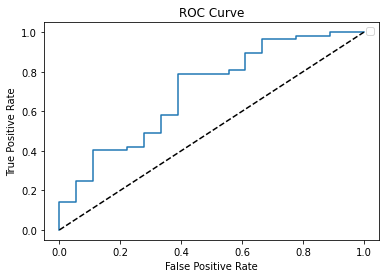

In [73]:
#### ROC curve
    
fpr, tpr, thresholds = roc_curve(y_val, y_pred[:,1])

print('AUC score:',auc_score)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--', color = 'k')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
